In [1]:
import mdtraj as md

In [2]:
import numpy as np

In [6]:
trajectory = md.load('traj.pdb')

In [7]:
atom_indices = list(range(0, 40))

In [8]:
trajectory_reduced = trajectory.atom_slice(atom_indices)

In [9]:
rmsd_matrix = np.zeros((trajectory_reduced.n_frames, trajectory_reduced.n_frames))
for i in range(trajectory_reduced.n_frames):
    rmsd_matrix[i, :] = md.rmsd(trajectory_reduced, trajectory_reduced, frame=i)

In [10]:
from sklearn.cluster import DBSCAN

In [131]:
#dbscan = DBSCAN(eps=0.3, min_samples=7, metric='precomputed')
#cluster_labels = dbscan.fit_predict(rmsd_matrix)

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=5)  # Puedes probar con 5, 7, o más clusters
cluster_labels = kmeans.fit_predict(rmsd_matrix)

In [134]:
import matplotlib.pyplot as plt

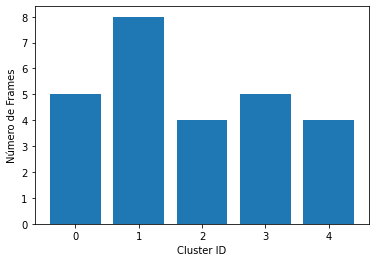

In [135]:
plt.hist(cluster_labels[cluster_labels != -1], bins=np.arange(0, np.max(cluster_labels)+2)-0.5, rwidth=0.8)
plt.xlabel('Cluster ID')
plt.ylabel('Número de Frames')
plt.show()

In [136]:
from collections import Counter

In [137]:
print("Etiquetas de clusters:", Counter(cluster_labels))

Etiquetas de clusters: Counter({1: 8, 0: 5, 3: 5, 2: 4, 4: 4})


In [138]:
rmsd_matrix = rmsd_matrix / rmsd_matrix.max()

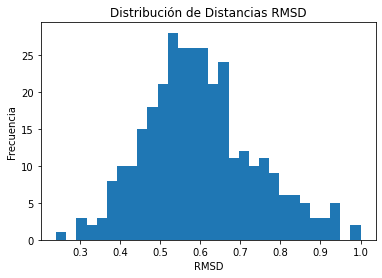

In [139]:
distances = rmsd_matrix[np.triu_indices_from(rmsd_matrix, k=1)]
plt.hist(distances, bins=30)
plt.xlabel("RMSD")
plt.ylabel("Frecuencia")
plt.title("Distribución de Distancias RMSD")
plt.show()

In [140]:
from sklearn.neighbors import NearestNeighbors

In [141]:
for cluster_id in set(cluster_labels):
    # Encuentra los índices de frames en cada cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    print(f"Frames en cluster {cluster_id}: {cluster_indices}")
    # Puedes analizar o visualizar estos frames individualmente


Frames en cluster 0: [ 4  8 13 20 25]
Frames en cluster 1: [ 0  2  3  7 19 21 22 24]
Frames en cluster 2: [ 1  6  9 18]
Frames en cluster 3: [10 14 15 17 23]
Frames en cluster 4: [ 5 11 12 16]


In [25]:
from collections import Counter

In [143]:
cluster_counts = Counter(cluster_labels)
total_frames = len(cluster_labels)
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} frames ({(count / total_frames) * 100:.2f}%)")

Cluster 1: 8 frames (30.77%)
Cluster 2: 4 frames (15.38%)
Cluster 0: 5 frames (19.23%)
Cluster 4: 4 frames (15.38%)
Cluster 3: 5 frames (19.23%)


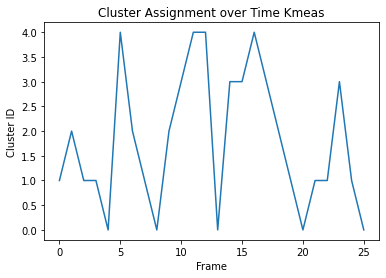

In [172]:
plt.plot(cluster_labels)
plt.xlabel("Frame")
plt.ylabel("Cluster ID")
plt.title("Cluster Assignment over Time Kmeas")
plt.show()

In [14]:
traj = md.load('traj.pdb')

In [19]:
from sklearn.cluster import SpectralClustering

In [20]:
rmsd_values = md.rmsd(traj, traj, atom_indices=np.arange(40))

<ipython-input-20-a82420d89be8>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rmsd_values = md.rmsd(traj, traj, atom_indices=np.arange(40))


In [21]:
n_frames = traj.n_frames
rmsd_matrix = np.zeros((n_frames, n_frames))

In [22]:
for i in range(n_frames):
    rmsd_matrix[i] = md.rmsd(traj, traj, atom_indices=np.arange(40), frame=i)


<ipython-input-22-bddb2c1ee1f0>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rmsd_matrix[i] = md.rmsd(traj, traj, atom_indices=np.arange(40), frame=i)


In [23]:
spectral = SpectralClustering(n_clusters=5, affinity='precomputed', assign_labels='discretize')
cluster_labels2 = spectral.fit_predict(rmsd_matrix)


/home/luisa/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)


In [26]:
print("Etiquetas de clusters:", Counter(cluster_labels2))

Etiquetas de clusters: Counter({3: 11, 0: 7, 1: 6, 2: 1, 4: 1})


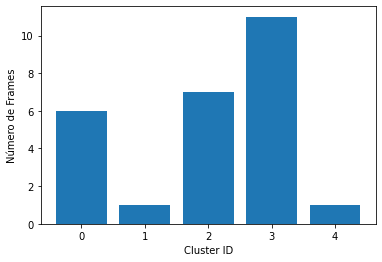

In [159]:
plt.hist(cluster_labels2[cluster_labels2 != -1], bins=np.arange(0, np.max(cluster_labels2)+2)-0.5, rwidth=0.8)
plt.xlabel('Cluster ID')
plt.ylabel('Número de Frames')
plt.show()

In [170]:
for cluster_id in set(cluster_labels2):
    # Encuentra los índices de frames en cada cluster
    cluster_indices2 = np.where(cluster_labels2 == cluster_id)[0]
    print(f"Frames en cluster {cluster_id}: {cluster_indices2}")
    # Puedes analizar o visualizar estos frames individualmente

Frames en cluster 0: [ 0  2 12 17 18 21]
Frames en cluster 1: [15]
Frames en cluster 2: [ 1  3  4  7 10 11 13]
Frames en cluster 3: [ 5  6  8  9 14 16 19 20 22 23 24]
Frames en cluster 4: [25]


In [168]:
cluster_counts = Counter(cluster_labels2)
total_frames = len(cluster_labels)
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} frames ({(count / total_frames) * 100:.2f}%)")

Cluster 0: 6 frames (23.08%)
Cluster 2: 7 frames (26.92%)
Cluster 3: 11 frames (42.31%)
Cluster 1: 1 frames (3.85%)
Cluster 4: 1 frames (3.85%)


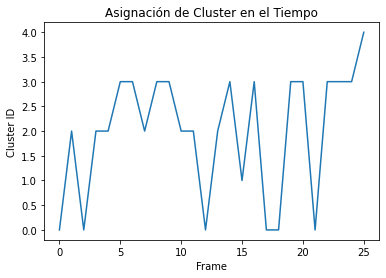

In [169]:
plt.plot(cluster_labels2)
plt.xlabel("Frame")
plt.ylabel("Cluster ID")
plt.title("Asignación de Cluster en el Tiempo")
plt.show()

In [3]:
import matplotlib.pyplot as plt

# Supongamos que ya has calculado cluster_labels y cluster_labels2

# Crear una nueva figura
plt.figure(figsize=(12, 6))

# Graficar cluster_labels
plt.plot(cluster_labels, label='KMeans Cluster', marker='o', linestyle='-', color='b', alpha=0.7)

# Graficar cluster_labels2
plt.plot(cluster_labels2, label='Spectral Clustering', marker='x', linestyle='--', color='r', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel("Frame")
plt.ylabel("Cluster ID")
plt.title("Cluster Assignment over Time")
plt.legend()  # Añadir leyenda para identificar cada serie

# Mostrar la gráfica
plt.show()

NameError: name 'cluster_labels' is not defined

<Figure size 864x432 with 0 Axes>

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.spatial.distance import pdist,squareform
from collections import OrderedDict
from itertools import combinations,product
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelPropagation
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error,f1_score

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.spatial.distance import pdist, squareform
import MDAnalysis as mda

/home/luisa/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


number 3.365211248397827


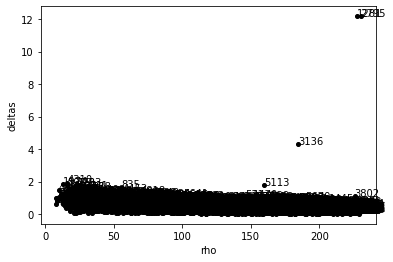

cluster-centers [2795 1281 3136]


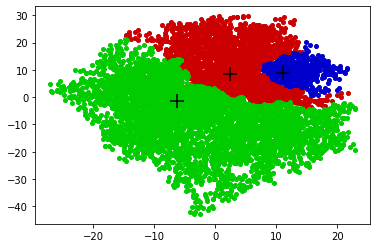

NameError: name 'ts' is not defined

In [187]:
def getDistCut(distList,distPercent):
    return max(distList) * distPercent / 100
 
def getRho(n,distMatrix,distCut):
    rho = np.zeros(n,dtype=float)
    for i in range(n-1):
        for j in range(i+1,n):
            rho[i] = rho[i] + np.exp(-(distMatrix[i, j] / distCut) ** 2)
            rho[j] = rho[j] + np.exp(-(distMatrix[i, j] / distCut) ** 2)
    return rho


def DPCA(n,distMatrix,rho,blockNum):
    rhoOrdIndex = np.flipud(np.argsort(rho))
    delta = np.zeros(n,dtype=float)
    leader = np.ones(n,dtype=int) * int(-1)
    maxdist = 0
    for ele in range(n):
        if distMatrix[rhoOrdIndex[0],ele] > maxdist:
            maxdist = distMatrix[rhoOrdIndex[0],ele]
    delta[rhoOrdIndex[0]] = maxdist
    for i in range(1,n):
        mindist = np.inf
        minindex = -1
        for j in range(i):
            if distMatrix[rhoOrdIndex[i],rhoOrdIndex[j]] < mindist:
                mindist = distMatrix[rhoOrdIndex[i],rhoOrdIndex[j]]
                minindex = rhoOrdIndex[j]
        delta[rhoOrdIndex[i]] = mindist
        leader[rhoOrdIndex[i]] = minindex
    gamma = delta * rho
    gammaOrdIdx = np.flipud(np.argsort(gamma))
    clusterIdx = np.ones(n,dtype=int) * (-1)
    for k in range(blockNum):
        clusterIdx[gammaOrdIdx[k]] = k
    for i in range(n):
        if clusterIdx[rhoOrdIndex[i]] == -1:
            clusterIdx[rhoOrdIndex[i]] = clusterIdx[leader[rhoOrdIndex[i]]]
    clusterSet = OrderedDict()
    for k in range(blockNum):
        clusterSet[k] = []
    for i in range(n):
        clusterSet[clusterIdx[i]].append(i)
    return clusterSet


def getDistanceMatrix(datas):
    N,D = np.shape(datas)
    dists = np.zeros([N,N])
    
    for i in range(N):
        for j in range(N):
            vi = datas[i,:]
            vj = datas[j,:]
            dists[i,j]= np.sqrt(np.dot((vi-vj),(vi-vj)))
    return dists

def select_dc(dists):    
    N = np.shape(dists)[0]
    tt = np.reshape(dists,N*N)
    percent = 2.0
    position = int(N * (N - 1) * percent / 100)
    dc = np.sort(tt)[position  + N]
    
    return dc
    
def get_density(dists,dc,method=None):
    N = np.shape(dists)[0]
    rho = np.zeros(N)
    
    for i in range(N):
        if method == None:
            rho[i]  = np.where(dists[i,:]<dc)[0].shape[0]-1
        else:
            rho[i] = np.sum(np.exp(-(dists[i,:]/dc)**2))-1
    return rho
    

def get_deltas(dists,rho):
    N = np.shape(dists)[0]
    deltas = np.zeros(N)
    nearest_neiber = np.zeros(N)

    index_rho = np.argsort(-rho)
    for i,index in enumerate(index_rho):

        if i==0:
            continue
  
        index_higher_rho = index_rho[:i]
 
        deltas[index] = np.min(dists[index,index_higher_rho])
        
        index_nn = np.argmin(dists[index,index_higher_rho])
        nearest_neiber[index] = index_higher_rho[index_nn].astype(int)
    
    deltas[index_rho[0]] = np.max(deltas)   
    return deltas,nearest_neiber
        

def find_centers_auto(rho,deltas):
    rho_threshold = (np.min(rho) + np.max(rho))/ 2
    delta_threshold  = (np.min(deltas) + np.max(deltas))/ 2
    N = np.shape(rho)[0]
    
    centers = []
    for i in range(N):
        if rho[i]>=rho_threshold and deltas[i]>delta_threshold:
            centers.append(i)
    return np.array(centers)

  
def find_centers_K(rho,deltas,K):
    rho_delta = rho*deltas
    centers = np.argsort(-rho_delta)
    return centers[:K]


def cluster_PD(rho,centers,nearest_neiber):
    K = np.shape(centers)[0]
    if K == 0:
        print("can not find centers")
        return
    
    N = np.shape(rho)[0]
    labs = -1*np.ones(N).astype(int)
    

    for i, center in enumerate(centers):
        labs[center] = i
   

    index_rho = np.argsort(-rho)
    for i, index in enumerate(index_rho):

        if labs[index] == -1:
            labs[index] = labs[int(nearest_neiber[index])]
    return labs
        
def draw_decision(rho,deltas,name="1.jpg"):       
    plt.cla()
    for i in range(np.shape(datas)[0]):
        plt.scatter(rho[i],deltas[i],s=16.,color=(0,0,0))
        plt.annotate(str(i), xy = (rho[i], deltas[i]),xytext = (rho[i], deltas[i]))
        plt.xlabel("rho")
        plt.ylabel("deltas")
    plt.savefig(name)
    plt.show()

def draw_cluster(datas,labs,centers, dic_colors, name="1.jpg"):     
    plt.cla()
    K = np.shape(centers)[0]
    
    for k in range(K):
        sub_index = np.where(labs == k)
        sub_datas = datas[sub_index]
        plt.scatter(sub_datas[:,0],sub_datas[:,1],s=16.,color=dic_colors[k])
        plt.scatter(datas[centers[k],0],datas[centers[k],1],color="k",marker="+",s = 200.)
    plt.savefig(name)
    plt.show()

    
        
    
if __name__== "__main__":
    
    dic_colors = {0:(.8,0,0),1:(0,.8,0),
                  2:(0,0,.8),3:(.8,.8,0),
                  4:(.8,0,.8),5:(0,.8,.8),
                  7:(0,0,0)}
    file_name = "DPCA" 
     # Cargar el archivo PDB
    u = mda.Universe('traj.pdb')  # Cambia el nombre del archivo si es necesario
    # Extraer las coordenadas de los átomos (puedes ajustar el selection)
    atoms = u.atoms  # Obtiene todos los átomos
    datas = atoms.positions  # Obtiene las posiciones en 3D (Nx3)

    # Si necesitas trabajar en 2D, puedes reducir la dimensionalidad o seleccionar solo 2 columnas
    datas = datas[:, :2]  # Selecciona solo las primeras dos dimensiones (X, Y)

    # Ahora continúa con el clustering
    dists = getDistanceMatrix(datas)
    dc = select_dc(dists)
    print("number", dc)
    rho = get_density(dists, dc, method="Gaussion")  # puedes usar otro método si lo deseas
    deltas, nearest_neiber = get_deltas(dists, rho)
    draw_decision(rho, deltas, name=file_name + "_decision.jpg")
    centers = find_centers_K(rho, deltas, 3)
    print("cluster-centers", centers)
    labs = cluster_PD(rho, centers, nearest_neiber)
    draw_cluster(datas, labs, centers, dic_colors, name=file_name + "_cluster-result.jpg")
    

/home/luisa/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


distance cutoff 1.3087438901493442e-06


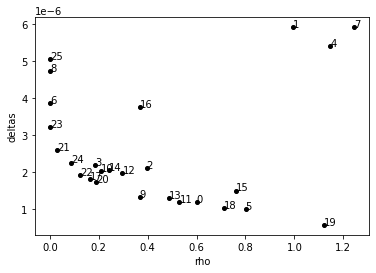

cluster-centers [7 4 1]


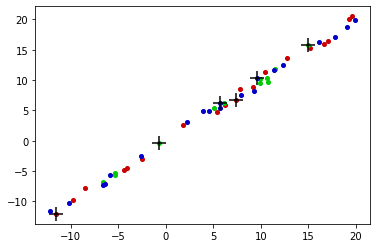

In [199]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from collections import OrderedDict

def getDistCut(distList, distPercent):
    return max(distList) * distPercent / 100

def getRho(n, distMatrix, distCut):
    rho = np.zeros(n, dtype=float)
    for i in range(n-1):
        for j in range(i+1, n):
            rho[i] = rho[i] + np.exp(-(distMatrix[i, j] / distCut) ** 2)
            rho[j] = rho[j] + np.exp(-(distMatrix[i, j] / distCut) ** 2)
    return rho

def DPCA(n, distMatrix, rho, blockNum):
    rhoOrdIndex = np.flipud(np.argsort(rho))
    delta = np.zeros(n, dtype=float)
    leader = np.ones(n, dtype=int) * int(-1)
    maxdist = 0
    for ele in range(n):
        if distMatrix[rhoOrdIndex[0], ele] > maxdist:
            maxdist = distMatrix[rhoOrdIndex[0], ele]
    delta[rhoOrdIndex[0]] = maxdist
    for i in range(1, n):
        mindist = np.inf
        minindex = -1
        for j in range(i):
            if distMatrix[rhoOrdIndex[i], rhoOrdIndex[j]] < mindist:
                mindist = distMatrix[rhoOrdIndex[i], rhoOrdIndex[j]]
                minindex = rhoOrdIndex[j]
        delta[rhoOrdIndex[i]] = mindist
        leader[rhoOrdIndex[i]] = minindex
    gamma = delta * rho
    gammaOrdIdx = np.flipud(np.argsort(gamma))
    clusterIdx = np.ones(n, dtype=int) * (-1)
    for k in range(blockNum):
        clusterIdx[gammaOrdIdx[k]] = k
    for i in range(n):
        if clusterIdx[rhoOrdIndex[i]] == -1:
            clusterIdx[rhoOrdIndex[i]] = clusterIdx[leader[rhoOrdIndex[i]]]
    clusterSet = OrderedDict()
    for k in range(blockNum):
        clusterSet[k] = []
    for i in range(n):
        clusterSet[clusterIdx[i]].append(i)
    return clusterSet

def getDistanceMatrixBetweenFrames(centers):
    N = len(centers)
    dist_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(i + 1, N):
            dist_matrix[i, j] = np.linalg.norm(centers[i] - centers[j])
            dist_matrix[j, i] = dist_matrix[i, j]  # La matriz es simétrica
    return dist_matrix

def select_dc(dists):    
    N = np.shape(dists)[0]
    tt = np.reshape(dists, N * N)
    percent = 2.0
    position = int(N * (N - 1) * percent / 100)
    dc = np.sort(tt)[position + N]
    
    return dc

def get_density(dists, dc, method=None):
    N = np.shape(dists)[0]
    rho = np.zeros(N)
    
    for i in range(N):
        if method == None:
            rho[i] = np.where(dists[i, :] < dc)[0].shape[0] - 1
        else:
            rho[i] = np.sum(np.exp(-(dists[i, :] / dc) ** 2)) - 1
    return rho

def get_deltas(dists, rho):
    N = np.shape(dists)[0]
    deltas = np.zeros(N)
    nearest_neiber = np.zeros(N)

    index_rho = np.argsort(-rho)
    for i, index in enumerate(index_rho):
        if i == 0:
            continue
  
        index_higher_rho = index_rho[:i]
 
        deltas[index] = np.min(dists[index, index_higher_rho])
        
        index_nn = np.argmin(dists[index, index_higher_rho])
        nearest_neiber[index] = index_higher_rho[index_nn].astype(int)
    
    deltas[index_rho[0]] = np.max(deltas)   
    return deltas, nearest_neiber
        

def find_centers_auto(rho, deltas):
    rho_threshold = (np.min(rho) + np.max(rho)) / 2
    delta_threshold = (np.min(deltas) + np.max(deltas)) / 2
    N = np.shape(rho)[0]
    
    centers = []
    for i in range(N):
        if rho[i] >= rho_threshold and deltas[i] > delta_threshold:
            centers.append(i)
    return np.array(centers)

def find_centers_K(rho, deltas, K):
    rho_delta = rho * deltas
    centers = np.argsort(-rho_delta)
    return centers[:K]

def cluster_PD(rho, centers, nearest_neiber):
    K = np.shape(centers)[0]
    if K == 0:
        print("Cannot find centers")
        return
    
    N = np.shape(rho)[0]
    labs = -1 * np.ones(N).astype(int)
    
    for i, center in enumerate(centers):
        labs[center] = i
    
    index_rho = np.argsort(-rho)
    for i, index in enumerate(index_rho):
        if labs[index] == -1:
            labs[index] = labs[int(nearest_neiber[index])]
    return labs

def draw_decision(rho, deltas, name="1.jpg"):       
    plt.cla()
    for i in range(np.shape(datas)[0]):
        plt.scatter(rho[i], deltas[i], s=16., color=(0, 0, 0))
        plt.annotate(str(i), xy=(rho[i], deltas[i]), xytext=(rho[i], deltas[i]))
        plt.xlabel("rho")
        plt.ylabel("deltas")
    plt.savefig(name)
    plt.show()

def draw_cluster(datas, labs, centers, dic_colors, name="1.jpg"):     
    plt.cla()
    K = np.shape(centers)[0]
    
    for k in range(K):
        sub_index = np.where(labs == k)
        sub_datas = datas[sub_index]
        plt.scatter(sub_datas[:, 0], sub_datas[:, 1], s=16., color=dic_colors[k])
        plt.scatter(datas[centers[k], 0], datas[centers[k], 1], color="k", marker="+", s=200.)
    plt.savefig(name)
    plt.show()

def getFrameCenters(datas):
    n_frames = datas.shape[0]
    centers = np.mean(datas, axis=1)  # Calcula el centro de masa de cada frame
    return centers

if __name__ == "__main__":
    dic_colors = {0: (.8, 0, 0), 1: (0, .8, 0),
                  2: (0, 0, .8), 3: (.8, .8, 0),
                  4: (.8, 0, .8), 5: (0, .8, .8),
                  7: (0, 0, 0)}
    file_name = "DPCA" 
    
    # Cargar el archivo PDB
    u = mda.Universe('traj.pdb')  # Cambia el nombre del archivo si es necesario
    
    # Extraer las coordenadas de los átomos (puedes ajustar el selection)
    atoms = u.atoms  # Obtiene todos los átomos
    
    # Extraer las posiciones para cada frame
    frames = []
    for ts in u.trajectory:  # Itera sobre todos los frames de la trayectoria
        frames.append(u.atoms.positions[:, :2])  # Solo toma las primeras dos dimensiones (X, Y)
    datas = np.array(frames)  # Esto tendrá la forma (num_frames, num_atoms, 2)
    
    # Calcular los centroides de cada frame
    centers = getFrameCenters(datas)
    
    # Calcular la matriz de distancias entre los centroides
    dist_matrix = getDistanceMatrixBetweenFrames(centers)
    
    # Seleccionar el corte de distancia
    dc = select_dc(dist_matrix)
    print("distance cutoff", dc)
    
    # Calcular la densidad
    rho = get_density(dist_matrix, dc, method="Gaussion")
    
    # Calcular los deltas y los vecinos más cercanos
    deltas, nearest_neiber = get_deltas(dist_matrix, rho)
    
    # Dibujar la decisión de clustering
    draw_decision(rho, deltas, name=file_name + "_decision.jpg")
    
    # Encontrar los centros de los clusters
    centers = find_centers_K(rho, deltas, 3)
    print("cluster-centers", centers)
    
    # Realizar el clustering basado en los centros
    labs = cluster_PD(rho, centers, nearest_neiber)
    
    # Dibujar los resultados del clustering
    draw_cluster(datas, labs, centers, dic_colors, name=file_name + "_cluster-result.jpg")


In [200]:
def get_cluster_info(labs):
    # Obtener los índices de los clusters únicos
    unique_clusters = np.unique(labs)
    
    # Crear un diccionario para almacenar los frames de cada cluster
    cluster_info = {}
    for cluster in unique_clusters:
        cluster_info[cluster] = np.where(labs == cluster)[0]  # Obtener los frames que pertenecen a este cluster
    
    # El número de clusters es el número de valores únicos en 'labs'
    num_clusters = len(unique_clusters)
    
    return num_clusters, cluster_info

# Obtener el número de clusters y los frames en cada cluster
num_clusters, cluster_info = get_cluster_info(labs)

# Imprimir los resultados
print(f"Hay {num_clusters} clusters.")
for cluster, frames in cluster_info.items():
    print(f"Cluster {cluster}: {len(frames)} frames -> Frames: {frames}")


Hay 3 clusters.
Cluster 0: 10 frames -> Frames: [ 2  3  7 12 13 14 15 17 19 20]
Cluster 1: 6 frames -> Frames: [ 4  5 18 22 24 25]
Cluster 2: 10 frames -> Frames: [ 0  1  6  8  9 10 11 16 21 23]


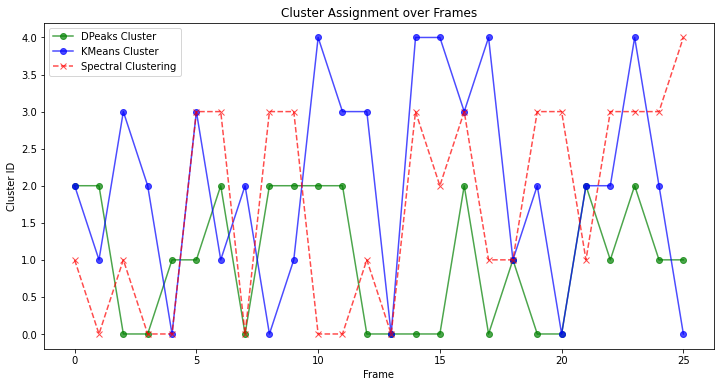

In [28]:
import matplotlib.pyplot as plt

# Crear un arreglo para los clústeres según el método dpeaks
cluster_labels_dpeaks = [-1] * 26  # Asumiendo un total de 26 frames (0 al 25)

# Asignar los valores a cada clúster
for frame in [2, 3, 7, 12, 13, 14, 15, 17, 19, 20]:
    cluster_labels_dpeaks[frame] = 0
for frame in [4, 5, 18, 22, 24, 25]:
    cluster_labels_dpeaks[frame] = 1
for frame in [0, 1, 6, 8, 9, 10, 11, 16, 21, 23]:
    cluster_labels_dpeaks[frame] = 2

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(cluster_labels_dpeaks, label='DPeaks Cluster', marker='o', linestyle='-', color='g', alpha=0.7)
# Graficar cluster_labels
plt.plot(cluster_labels, label='KMeans Cluster', marker='o', linestyle='-', color='b', alpha=0.7)

# Graficar cluster_labels2
plt.plot(cluster_labels2, label='Spectral Clustering', marker='x', linestyle='--', color='r', alpha=0.7)

# Etiquetas y título
plt.xlabel("Frame")
plt.ylabel("Cluster ID")
plt.title("Cluster Assignment over Frames")
plt.legend()
plt.show()

In [3]:
import mdtraj as md
import numpy as np

In [4]:
traj = md.load("traj.pdb")

In [5]:
atom_indices = list(range(0, 40))

In [6]:

# Número de frames en la trayectoria
n_frames = traj.n_frames

# Crear matriz de distancias
distance_matrix = np.zeros((n_frames, n_frames))

# Calcular distancias RMSD entre cada par de frames
for i in range(n_frames):
    ref_coords = traj.atom_slice(atom_indices).xyz[i]
    
    for j in range(i, n_frames):  # Solo calcular la mitad superior (matriz simétrica)
        target_coords = traj.atom_slice(atom_indices).xyz[j]
        
        # Calcular RMSD entre frame i y frame j
        rmsd_ij = md.rmsd(traj, traj, frame=i, atom_indices=atom_indices)[j]
        
        distance_matrix[i, j] = rmsd_ij
        distance_matrix[j, i] = rmsd_ij  # Reflejar la simetría

# Imprimir o guardar la matriz de distancias
print("Matriz de distancias RMSD:")
print(distance_matrix)

<ipython-input-6-209f7e342122>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rmsd_ij = md.rmsd(traj, traj, frame=i, atom_indices=atom_indices)[j]


Matriz de distancias RMSD:
[[0.00000000e+00 2.12653965e-01 1.94151700e-01 1.81933612e-01
  1.70212343e-01 1.86496660e-01 2.18047187e-01 2.16062546e-01
  2.14973658e-01 2.31498510e-01 2.97330678e-01 1.98018193e-01
  2.00341687e-01 2.27016345e-01 2.50100106e-01 2.46244550e-01
  1.81582794e-01 2.71609455e-01 1.95094913e-01 1.96561068e-01
  1.44374698e-01 1.82527348e-01 1.35537416e-01 2.76517659e-01
  2.34649241e-01 2.36528590e-01]
 [2.12653965e-01 0.00000000e+00 2.99268842e-01 2.68287361e-01
  3.11049789e-01 3.29629302e-01 1.98276639e-01 2.39761412e-01
  3.32836062e-01 2.00193226e-01 3.93619150e-01 3.25479388e-01
  3.27895671e-01 3.56173247e-01 3.68971974e-01 3.50552410e-01
  3.07760954e-01 3.68818521e-01 1.88554078e-01 2.72709161e-01
  2.92657703e-01 2.35574529e-01 1.87316865e-01 3.71678650e-01
  2.64382184e-01 3.46446246e-01]
 [1.94151700e-01 2.99268842e-01 0.00000000e+00 1.87559813e-01
  2.16689512e-01 1.67538822e-01 2.43577182e-01 2.30885640e-01
  2.45496482e-01 2.78110445e-01 2.45368

In [7]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import DBSCAN

In [10]:
n_frames = traj.n_frames
distance_matrix = np.zeros((n_frames, n_frames))

for i in range(n_frames):
    rmsd_values = md.rmsd(traj, traj, frame=i, atom_indices=atom_indices)
    distance_matrix[i, :] = rmsd_values

# Convertir matriz de distancias RMSD a formato de distancias de pares
condensed_distances = squareform(distance_matrix, checks=False)

### Agrupamiento jerárquico
# Usamos 'average' para el método de enlace (otros métodos: 'single', 'complete', etc.)
linkage_matrix = linkage(condensed_distances, method='average')

# Definir el umbral para el agrupamiento jerárquico
threshold = 0.5  # Ajusta según tu criterio o datos específicos
hierarchical_clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Imprimir etiquetas de agrupamiento jerárquico
print("Agrupamiento Jerárquico - Etiquetas de Cluster:")
print(hierarchical_clusters)

### Agrupamiento DBSCAN
# Definir el parámetro epsilon y el número mínimo de muestras
epsilon = 0.5  # Ajusta según tu criterio o datos específicos
min_samples = 10
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='precomputed')
dbscan_clusters = dbscan.fit_predict(distance_matrix)

# Imprimir etiquetas de agrupamiento DBSCAN
print("Agrupamiento DBSCAN - Etiquetas de Cluster:")
print(dbscan_clusters)

### Identificación de la Conformación Representativa (Medoid)
# Función para obtener el medoid de cada cluster
def find_medoid(distance_matrix, labels):
    unique_labels = np.unique(labels)
    medoids = {}
    for label in unique_labels:
        if label == -1:  # Ignorar ruido de DBSCAN (etiqueta -1)
            continue
        indices = np.where(labels == label)[0]
        # Calcular la suma de distancias dentro del grupo
        cluster_distances = distance_matrix[np.ix_(indices, indices)]
        medoid_index = indices[np.argmin(np.sum(cluster_distances, axis=0))]
        medoids[label] = medoid_index
    return medoids

# Obtener el medoid para los clusters jerárquicos
hierarchical_medoids = find_medoid(distance_matrix, hierarchical_clusters)
print("Medoids para agrupamiento jerárquico:")
print(hierarchical_medoids)

# Obtener el medoid para los clusters DBSCAN
dbscan_medoids = find_medoid(distance_matrix, dbscan_clusters)
print("Medoids para agrupamiento DBSCAN:")
print(dbscan_medoids)

Agrupamiento Jerárquico - Etiquetas de Cluster:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Agrupamiento DBSCAN - Etiquetas de Cluster:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Medoids para agrupamiento jerárquico:
{1: 20}
Medoids para agrupamiento DBSCAN:
{0: 20}


<ipython-input-10-3b8175ddf9cd>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rmsd_values = md.rmsd(traj, traj, frame=i, atom_indices=atom_indices)


Sirve Algoritmo propio 

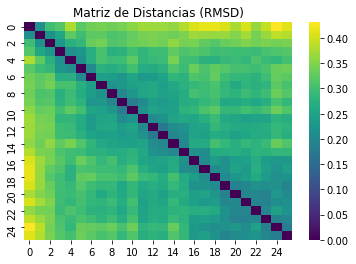

Etiquetas de Cluster - Agrupamiento Jerárquico: [1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Etiquetas de Cluster - DBSCAN: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
Medoids para agrupamiento jerárquico: {1: 1, 2: 13}
Medoids para agrupamiento DBSCAN: {}


/home/luisa/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


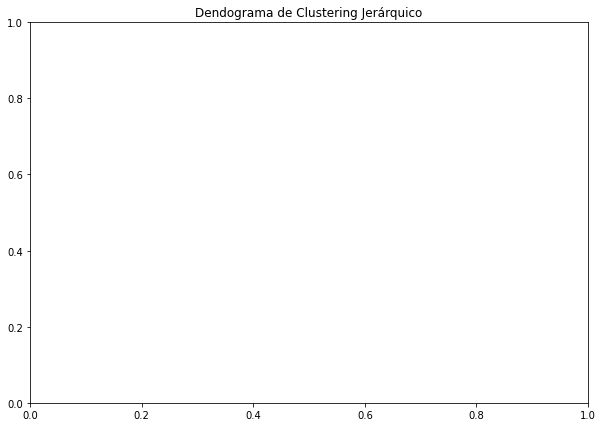

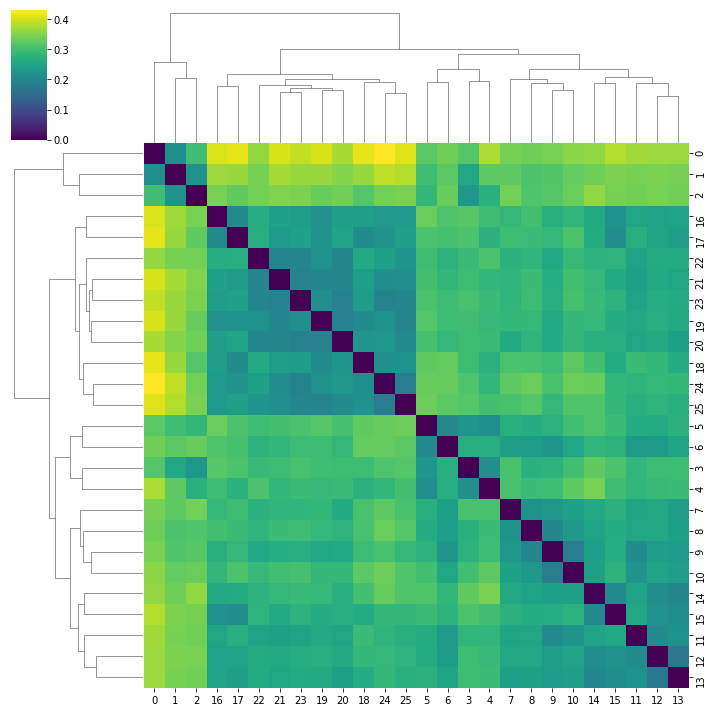

In [13]:
import mdtraj as md
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la trayectoria
traj = md.load('traj.pdb')  # Asegúrate de que el archivo esté en formato PDB o compatible con MDTraj

# Calcular la matriz de distancias usando RMSD entre todas las conformaciones
num_frames = traj.n_frames
distance_matrix = np.zeros((num_frames, num_frames))

for i in range(num_frames):
    rmsd_values = md.rmsd(traj, traj, frame=i)
    distance_matrix[i, :] = rmsd_values
    distance_matrix[:, i] = rmsd_values  # Simetría en la matriz de distancias

# Visualización de la matriz de distancias
sns.heatmap(distance_matrix, cmap='viridis')
plt.title("Matriz de Distancias (RMSD)")
plt.show()

# Clustering jerárquico
threshold = 0.3  # Ajustar según los resultados observados
linkage_matrix = linkage(squareform(distance_matrix), method='average')
labels_hierarchical = fcluster(linkage_matrix, threshold, criterion='distance')

# Imprimir etiquetas de cluster
print("Etiquetas de Cluster - Agrupamiento Jerárquico:", labels_hierarchical)

# DBSCAN con eps ajustado
eps_value = 0.05  # Ajustar eps según los resultados
dbscan_model = DBSCAN(eps=eps_value, min_samples=2, metric='precomputed')
labels_dbscan = dbscan_model.fit_predict(distance_matrix)

# Imprimir etiquetas de cluster DBSCAN
print("Etiquetas de Cluster - DBSCAN:", labels_dbscan)

# Encontrar la conformación representativa (medoid) para cada cluster en agrupamiento jerárquico
unique_clusters = np.unique(labels_hierarchical)
medoids_hierarchical = {}
for cluster in unique_clusters:
    indices = np.where(labels_hierarchical == cluster)[0]
    sub_matrix = distance_matrix[np.ix_(indices, indices)]
    medoid_index = indices[np.argmin(sub_matrix.sum(axis=0))]  # Índice del medoid
    medoids_hierarchical[cluster] = medoid_index

print("Medoids para agrupamiento jerárquico:", medoids_hierarchical)

# Encontrar la conformación representativa (medoid) para cada cluster en DBSCAN
unique_clusters_dbscan = np.unique(labels_dbscan)
medoids_dbscan = {}
for cluster in unique_clusters_dbscan:
    if cluster != -1:  # Ignorar puntos de ruido
        indices = np.where(labels_dbscan == cluster)[0]
        sub_matrix = distance_matrix[np.ix_(indices, indices)]
        medoid_index = indices[np.argmin(sub_matrix.sum(axis=0))]
        medoids_dbscan[cluster] = medoid_index

print("Medoids para agrupamiento DBSCAN:", medoids_dbscan)

# Visualizar dendograma de agrupamiento jerárquico
plt.figure(figsize=(10, 7))
plt.title("Dendograma de Clustering Jerárquico")
sns.clustermap(distance_matrix, row_cluster=True, col_cluster=True, cmap="viridis", method='average')
plt.show()


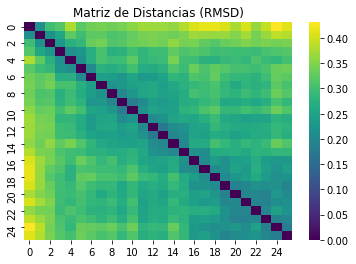

Etiquetas de Cluster - K-means: [3 3 3 1 1 1 2 2 2 2 2 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0]
Etiquetas de Cluster - Clustering Espectral: [4 3 4 1 4 2 4 1 4 2 1 4 1 4 4 1 4 4 4 1 2 4 4 1 0 4]


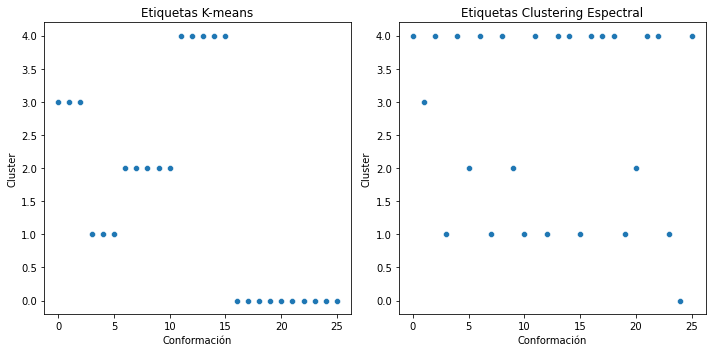

Medoids para agrupamiento K-means: {0: 19, 1: 4, 2: 9, 3: 1, 4: 13}
Medoids para agrupamiento Clustering Espectral: {0: 24, 1: 12, 2: 9, 3: 1, 4: 13}


In [17]:
import mdtraj as md
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la trayectoria
traj = md.load('traj.pdb')  # Asegúrate de que el archivo esté en formato PDB o compatible con MDTraj

# Calcular la matriz de distancias usando RMSD entre todas las conformaciones
num_frames = traj.n_frames
distance_matrix = np.zeros((num_frames, num_frames))

for i in range(num_frames):
    rmsd_values = md.rmsd(traj, traj, frame=i)
    distance_matrix[i, :] = rmsd_values
    distance_matrix[:, i] = rmsd_values  # Simetría en la matriz de distancias

# Visualización de la matriz de distancias
sns.heatmap(distance_matrix, cmap='viridis')
plt.title("Matriz de Distancias (RMSD)")
plt.show()

# Clustering con K-means
num_clusters = 5  # Ajusta según el análisis de la matriz de distancias o dendrogramas previos
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels_kmeans = kmeans.fit_predict(distance_matrix)

# Imprimir etiquetas de cluster K-means
print("Etiquetas de Cluster - K-means:", labels_kmeans)

# Clustering espectral (Spectral Clustering)
spectral = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=0)
labels_spectral = spectral.fit_predict(distance_matrix)

# Imprimir etiquetas de cluster Spectral Clustering
print("Etiquetas de Cluster - Clustering Espectral:", labels_spectral)

# Visualización de los resultados de clustering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=np.arange(num_frames), y=labels_kmeans, palette="viridis", marker="o")
plt.title("Etiquetas K-means")
plt.xlabel("Conformación")
plt.ylabel("Cluster")

plt.subplot(1, 2, 2)
sns.scatterplot(x=np.arange(num_frames), y=labels_spectral, palette="viridis", marker="o")
plt.title("Etiquetas Clustering Espectral")
plt.xlabel("Conformación")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

# Encontrar la conformación representativa (medoid) para cada cluster en K-means
unique_clusters_kmeans = np.unique(labels_kmeans)
medoids_kmeans = {}
for cluster in unique_clusters_kmeans:
    indices = np.where(labels_kmeans == cluster)[0]
    sub_matrix = distance_matrix[np.ix_(indices, indices)]
    medoid_index = indices[np.argmin(sub_matrix.sum(axis=0))]
    medoids_kmeans[cluster] = medoid_index

print("Medoids para agrupamiento K-means:", medoids_kmeans)

# Encontrar la conformación representativa (medoid) para cada cluster en Spectral Clustering
unique_clusters_spectral = np.unique(labels_spectral)
medoids_spectral = {}
for cluster in unique_clusters_spectral:
    indices = np.where(labels_spectral == cluster)[0]
    sub_matrix = distance_matrix[np.ix_(indices, indices)]
    medoid_index = indices[np.argmin(sub_matrix.sum(axis=0))]
    medoids_spectral[cluster] = medoid_index

print("Medoids para agrupamiento Clustering Espectral:", medoids_spectral)


In [26]:
# Imprimir las conformaciones que pertenecen a cada cluster
def print_conformations_for_clusters(labels, method_name):
    print(f"\nConformaciones para cada cluster ({method_name}):")
    unique_clusters = np.unique(labels)
    for cluster in unique_clusters:
        conformations_in_cluster = np.where(labels == cluster)[0]
        print(f"Cluster {cluster}: {conformations_in_cluster}")

# Llamar a la función para imprimir las conformaciones de los clusters
print_conformations_for_clusters(labels_kmeans, "K-means")
print_conformations_for_clusters(labels_spectral, "Clustering Espectral")



Conformaciones para cada cluster (K-means):
Cluster 0: [16 17 18 19 20 21 22 23 24 25]
Cluster 1: [3 4 5]
Cluster 2: [ 6  7  8  9 10]
Cluster 3: [0 1 2]
Cluster 4: [11 12 13 14 15]

Conformaciones para cada cluster (Clustering Espectral):
Cluster 0: [24]
Cluster 1: [ 3  7 10 12 15 19 23]
Cluster 2: [ 5  9 20]
Cluster 3: [1]
Cluster 4: [ 0  2  4  6  8 11 13 14 16 17 18 21 22 25]


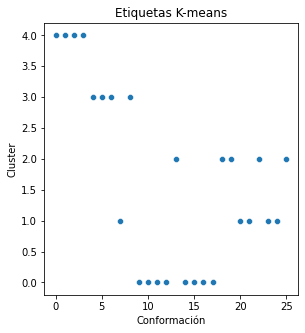

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los frames de cada cluster
cluster_0 = [9, 10, 11, 12, 14, 15, 16, 17]
cluster_1 = [7, 20, 21, 23, 24]
cluster_2 = [13, 18, 19, 22, 25]
cluster_3 = [4, 5, 6, 8]
cluster_4 = [0, 1, 2, 3, 4]

# Crear un array de etiquetas (clusters) para cada frame
num_frames = 26  # Total de frames
labels_kmeans = np.zeros(num_frames)  # Inicializa las etiquetas a 0

# Asignar las etiquetas de los clusters a cada frame
for i in range(num_frames):
    if i in cluster_0:
        labels_kmeans[i] = 0
    elif i in cluster_1:
        labels_kmeans[i] = 1
    elif i in cluster_2:
        labels_kmeans[i] = 2
    elif i in cluster_3:
        labels_kmeans[i] = 3
    elif i in cluster_4:
        labels_kmeans[i] = 4

# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=np.arange(num_frames), y=labels_kmeans, palette="viridis", marker="o")
plt.title("Etiquetas K-means Prime")
plt.xlabel("Conformación")
plt.ylabel("Cluster")

# Mostrar la gráfica
plt.show()


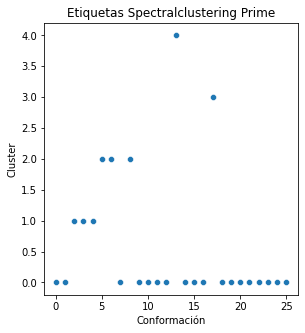

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los frames de cada cluster
cluster_0 = [0,1,9,10,11,12,14,15,16,18,19,29,21,22,23,24,25]
cluster_1 = [2,3,4]
cluster_2 = [5,6,8]
cluster_3 = [17]
cluster_4 = [13]

# Crear un array de etiquetas (clusters) para cada frame
num_frames = 26  # Total de frames
labels_kmeans = np.zeros(num_frames)  # Inicializa las etiquetas a 0

# Asignar las etiquetas de los clusters a cada frame
for i in range(num_frames):
    if i in cluster_0:
        labels_kmeans[i] = 0
    elif i in cluster_1:
        labels_kmeans[i] = 1
    elif i in cluster_2:
        labels_kmeans[i] = 2
    elif i in cluster_3:
        labels_kmeans[i] = 3
    elif i in cluster_4:
        labels_kmeans[i] = 4

# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=np.arange(num_frames), y=labels_kmeans, palette="viridis", marker="o")
plt.title("Etiquetas Spectralclustering Prime")
plt.xlabel("Conformación")
plt.ylabel("Cluster")

# Mostrar la gráfica
plt.show()
